# 📚 <span style='color:#0D2BA5'>**Mission - Classifiez automatiquement des biens de consommation**</span>

# <font color='DodgerBlue'>SOMMAIRE<font></a>
    
### <a href="#C1"><font color='DodgerBlue'> 1.Préparation des données </a>
******    
### <a href="#C2"><font color='DodgerBlue'>2. Prise en main des jeux de données </a>
******    
   - <a href="#C3"><font color='RoyalBlue'>**2.1 Extraction des Sous-Catégories**</a>
   - <a href="#C4"><font color='RoyalBlue'>**2.2 Affichage de produits de la catégories principale**</a>
******
### <a href="#C5"><font color='DodgerBlue'>3. NLP (Natural Language Processing</a>
******
   - <a href="#C6"><font color='RoyalBlue'>**3.1 Text Preprocessing**</a>
******
   - <a href="#C7"><font color='RoyalBlue'>**3.2 Tokenizer**</a>  
****** 
### <a href="#C8"><font color='DodgerBlue'>4. Approches NLP utilisées</a>
******
   - <a href="#C9"><font color='RoyalBlue'>**4.1 Première approche : Fréquentiste / Classique**</a>
******
   - <a href="#C10"><font color='RoyalBlue'>**4.1.1 Vectorisation des Textes**</a>
   - <a href="#C11"><font color='RoyalBlue'>**4.1.2 PCA / T-SNE / K-Means**</a>  
   - <a href="#C12"><font color='RoyalBlue'>**4.1.3 Réduction de dimension en 2 composantes T-SNE**</a>
   - <a href="#C13"><font color='RoyalBlue'>**4.1.4 Visualisation**</a>  
   - <a href="#C14"><font color='RoyalBlue'>**4.1.5 ARI Score**</a>  
   - <a href="#C15"><font color='RoyalBlue'>**4.1.6 Analyse des catégories (clusters de produits)**</a>
   - <a href="#C16"><font color='RoyalBlue'>**4.1.7 TF-IDF (term frequency-inverse document frequency)**</a>
******
   - <a href="#C17"><font color='RoyalBlue'>**4.2 Deuxième approche : Embedding**</a>
******
   - <a href="#C18"><font color='RoyalBlue'>**4.2.1 Word2Vec**</a>  
   - <a href="#C19"><font color='RoyalBlue'>**4.2.2 BERT**</a>  
   - <a href="#C20"><font color='RoyalBlue'>**4.2.3 USE - Universal Sentence Encoder**</a>  

<figure><a class="oc-imageLink oc-imageLink--disabled custom-link" href="https://user.oc-static.com/upload/2019/02/24/15510259240381_Projet%20textimage%20logo.png"><a href="https://user.oc-static.com/upload/2019/02/24/15510259240381_Projet%20textimage%20logo.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2019/02/24/15510259240381_Projet%20textimage%20logo.png" alt="logo entreprise place de marché"></a></a></figure>

- **L'objectif de ce projet** est de développer un moteur de classification automatique pour les articles d'une marketplace e-commerce, en utilisant des descriptions textuelles et des images des produits. Cela permettra d'attribuer automatiquement une catégorie appropriée à chaque article, améliorant ainsi l'expérience utilisateur pour les vendeurs et les acheteurs en rendant la mise en ligne et la recherche de produits plus fluides et fiables.

# <a name="C1"><font color='RoyalBlue'> 1. Préparation des données</a>

In [299]:
import os
import shutil

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords as nltk_stopwords 
from nltk import word_tokenize
from collections import defaultdict
from nltk.corpus import stopwords, wordnet
from nltk.stem.snowball import FrenchStemmer
from nltk.stem.snowball import EnglishStemmer
from nltk.cluster import KMeansClusterer, euclidean_distance
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer 
from nltk.stem.snowball import EnglishStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import manifold, decomposition
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import tensorflow_hub as hub

import transformers
from transformers import TFAutoModel
from transformers import AutoTokenizer
from transformers import TFBertModel

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\samir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [300]:
# Chargement du jeu de données
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [301]:
# Taille : nombre de lignes/colonnes
nRow, nVar = data.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 1050 lignes et 15 variables.


# <a name="C2"><font color='RoyalBlue'> 2. Prise en main des jeux de données</a>

- ***Le jeu de données contient des informations sur divers produits de l'e-commerce Flipkart, incluant des descriptions textuelles, des images, des prix, des catégories, des évaluations et des spécifications détaillées.***

#### <font color='Blue'> **Connaissance du jeu de données et Nettoyage**

In [305]:
#Création d'une fonction pour analyser la structure des dataframes

def data_structure(data):
    ''' Affiche la structure du dataframe'''
    
    # comptage des colonnes numériques et catégorielles
    numeric_columns = len(data.select_dtypes(include = ['int64','float64']).columns)
    categorical_columns= len(data.select_dtypes(include=['object','category']).columns)

    # création d'un dictionnaire avec les items de structure de nos données
    dict_structure = {'Nombre de lignes':data.shape[0], 'Nombre de colonnes':int(data.shape[1]), 
                      'Nombre de variables catégorielles':categorical_columns,
                      'Nombre de variables numériques ':numeric_columns,
                      'Pourcentage de données manquantes':int((data.isnull().sum()/len(data)*100).sum()),
                      'Nombre de doublons':int(len(data[data.duplicated()]))}

    # transformation des éléments du dictionnaire en dataframe
    dataframe =pd.DataFrame(list(dict_structure.items()),columns=['Caractéristiques','Valeurs'])
    return dataframe

In [306]:
data_structure(data)

,Caractéristiques,Valeurs
0,Nombre de lignes,1050
1,Nombre de colonnes,15
2,Nombre de variables catégorielles,12
3,Nombre de variables numériques,2
4,Pourcentage de données manquantes,32
5,Nombre de doublons,0


In [307]:
#Création d'une fonction pour analyser le dataframe
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = df.columns.to_frame(name="column").set_index('column')
    desc['count'] = df.notnull().sum()
    desc['unique'] = df.nunique()
    desc['dtype'] = df.dtypes
    desc['count_null'] = df.isna().sum()
    desc['null%'] = round((df.isna().sum() / df.shape[0] * 100), 2)
    desc['duplicated'] = df.duplicated(keep=False).sum()
    return desc

# Appel à la fonction avec le dataframe `data`
(decrire_dataframe(data).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(lambda x: 'background-color: pink' if x == 0 else '', subset=['count', 'unique']))


,column,count,unique,dtype,count_null,null%,duplicated
0,uniq_id,1050,1050,object,0,0.000000,0
1,crawl_timestamp,1050,149,object,0,0.000000,0
2,product_url,1050,1050,object,0,0.000000,0
3,product_name,1050,1050,object,0,0.000000,0
4,product_category_tree,1050,642,object,0,0.000000,0
5,pid,1050,1050,object,0,0.000000,0
6,retail_price,1049,354,float64,1,0.100000,0
7,discounted_price,1049,424,float64,1,0.100000,0
8,image,1050,1050,object,0,0.000000,0
9,is_FK_Advantage_product,1050,2,bool,0,0.000000,0


- **Le jeu de données contient 1050 produits avec des informations complètes sur les descriptions textuelles, les images et les prix.**
****
- **Les colonnes "retail_price" et "discounted_price" contiennent des valeurs manquantes à hauteur de 0.1%.**
- **brand : 712 valeurs uniques sur 1050 avec 338 valeurs manquantes (32.19%).**
- **product_specifications : 1049 valeurs non-nulles sur 1050 avec 1 valeur manquante (0.1%)**
- **Les autres colonnes sont complètes, et il n'y a pas de valeurs dupliquées.**
*****
- **Le jeu de données comporte peu de valeurs manquantes (~ 2%), seule la variable 'brand' comporte plus de 30% de valeurs manquantes.**

#### <font color='Blue'> **Nous convertissons la colonne 'crawl_timestamp' en datetime**

In [310]:
data['crawl_timestamp'] = pd.to_datetime(data['crawl_timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  1050 non-null   object             
 1   crawl_timestamp          1050 non-null   datetime64[ns, UTC]
 2   product_url              1050 non-null   object             
 3   product_name             1050 non-null   object             
 4   product_category_tree    1050 non-null   object             
 5   pid                      1050 non-null   object             
 6   retail_price             1049 non-null   float64            
 7   discounted_price         1049 non-null   float64            
 8   image                    1050 non-null   object             
 9   is_FK_Advantage_product  1050 non-null   bool               
 10  description              1050 non-null   object             
 11  product_rating           1050 

**Compréhension des variables**
***
| Variable | Description | Note |
| --- | --- | --- |
| **uniq_id**| Identifiant unique | <span style='background:PeachPuff'>Clé unique</span> |
| **crawl_timestamp**| Date et heure  | Format YYYY-MM-DD HH24:MI:SS +0000|
| **product_url** | URL d'accès au produit sur le site e-commerce Flickart | <span style='background:PeachPuff'>Clé unique</span> |
| **product_name** | Nom du produit | <span style='background:PeachPuff'>Clé unique</span> - <span style='background:Aqua'>Texte</span> |
| **product_category_tree** | Arbre des catégories des produits | Notre cible - sous-catégories séparées par '>>' - <span style='background:Aqua'>Texte</span> - <span style='background:Salmon'>Données multiples</span>|
| **pid** | Identifiant unique du produit sur Flipkart | <span style='background:PeachPuff'>Clé unique</span> |
| **retail_price** | Prix de détail du produit |  |
| **discounted_price** | Prix réduit du produit|  |
| **image** | Image associée au produit | <span style='background:PeachPuff'>Clé unique</span> - Format : uniq_id.jpg |
| **is_FK_Advantage_product** | Indicateur si le produit fait partie des avantages Flipkart | Booléen |
| **description** | Description textuelle du produit | <span style='background:PeachPuff'>Clé unique</span> - <span style='background:Aqua'>Texte</span> |
| **product_rating** | Évaluation du produit | Entre 1 et 5 avec 1 chiffre après la virgule ou 'No rating available' |
| **overall_rating** | Note moyenne globale d'évaluation | Entre 1 et 5 avec 1 chiffre après la virgule ou 'No rating available' |
| **brand** | Marque du produit | Valeurs manquantes - <span style='background:Aqua'>Texte</span> |
| **product_specifications** | Spécifications détaillées du produit sous forme de texte JSON | Propriétés techniques avec clé/valeur  <span style='background:Salmon'>Données multiples</span> |



- ***Notes***
****
- Clé unique : Indique que la valeur est unique pour chaque entrée.
- Texte : Indique que la colonne contient des données textuelles.
- Booléen : Indique que la colonne contient des valeurs True/False.
- Données multiples : Indique que la colonne contient des informations structurées en plusieurs sous-catégories.
*****
- ***Ce tableau résume les principales caractéristiques des colonnes du jeu de données et fournit des informations sur les types de données et leur format.***

#### <font color='Blue'> **Les catégories produits : product_category_tree / Arbre des catégories des produits**

- **Chaque produit est catégorisée par un système d'arbres avec plusieurs niveaux. Le nom de la colonne renseignant les catégories est product_category_tree.**

In [314]:
print(data['product_category_tree'].head(1))

0    ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
Name: product_category_tree, dtype: object


- **product_category_tree, montre les catégories du produit sous forme de texte hiérarchique séparé par '>>'**

#### <font color='Blue'> **Etudions les catégories du dataset avec la hiérarchie des catégories**

In [317]:
pd.set_option('display.max_colwidth', 300)
data[['product_category_tree']]

,product_category_tree
0,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]"
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]"
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]"
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]"
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]"
...,...
1045,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]"
1046,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]"
1047,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]"
1048,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]"


In [318]:
df_category = data.copy()

#Créer une nouvelle colonne avec les catégories principales
def categ(data):
    categ=[]
    for i in data:
        if i == ">":
            break
        if  i == "[":
            continue
        if  i == '''"''':
            continue
        if  i == "&":
            continue
        categ.append(i)
    categ ="".join(categ).strip()
    return categ

df_category['main_category']=df_category['product_category_tree'].apply(categ)

# Nombre maximum des catégories
n_cat = df_category['product_category_tree'].str.count(">>").max()

#Créer de nouvelles colonnes pour les sous-catégories
for i in range(1, n_cat) :
  df_category['category_%i' %i]=df_category['product_category_tree'].str.split('>>', expand=True)[i]
  df_category['category_%i' %i] = df_category['category_%i' %i].str.replace(r'(^.*].*$)', 'None')
  df_category['category_%i' %i] = df_category['category_%i' %i].str.replace(" '", '')

In [319]:
df_category

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_category,category_1,category_2,category_3,category_4,category_5
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56+00:00,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multico...",Home Furnishing,Curtains & Accessories,Curtains,"Elegance Polyester Multicolor Abstract Eyelet Do...""]",None,None
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56+00:00,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",None
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56+00:00,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"", ""value""=>""SHUVAM20PCFTSETASSORTED""}, {""key""=>""Ide...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,"Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",Non

### <a name="C3"><font color='DodgerBlue'> 2.1 Extraction des Sous-Catégories</a> 

#### <font color='Blue'> **Séparerons les catégories hiérarchiques dans la colonne product_category_tree pour obtenir des sous-catégories individuelles.**

In [321]:
df_category['main_category'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor  Festive Needs', 'Kitchen  Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

#### <font color='Blue'> **Séparons les catégories principales des sous-catégories**

In [323]:
print('main_category  : ',df_category['main_category'].unique().size)
print('category_1 : ',  df_category['category_1'].unique().size)
print('category_2 : ',  df_category['category_2'].unique().size)
print('category_3 : ',  df_category['category_3'].unique().size)
print('category_4 : ',  df_category['category_4'].unique().size)
print('category_5 : ',  df_category['category_5'].unique().size)

main_category  :  7
category_1 :  63
category_2 :  247
category_3 :  351
category_4 :  298
category_5 :  118


In [324]:
# On attribue un numéro à chaque catégorie principale pour mieux les exploiter (tri par ordre alphabétique) :

df_category['Cluster_cat'] = ''

def assign_cluster(df):
    df.loc[df.eval("main_category == 'Baby Care'"), "Cluster_cat"] = 0
    df.loc[df.eval("main_category == 'Beauty and Personal Care'"), "Cluster_cat"] = 1
    df.loc[df.eval("main_category == 'Computers'"), "Cluster_cat"] = 2
    df.loc[df.eval("main_category == 'Home Decor  Festive Needs'"), "Cluster_cat"] = 3
    df.loc[df.eval("main_category == 'Home Furnishing'"), "Cluster_cat"] = 4
    df.loc[df.eval("main_category == 'Kitchen  Dining'"), "Cluster_cat"] = 5
    df.loc[df.eval("main_category == 'Watches'"), "Cluster_cat"] = 6
    return df

df_category = assign_cluster(df_category)

# On compte le nombre de produits par catégorie
df_category.groupby("main_category").agg({"uniq_id": "count"}).reset_index()

,main_category,uniq_id
0,Baby Care,150
1,Beauty and Personal Care,150
2,Computers,150
3,Home Decor Festive Needs,150
4,Home Furnishing,150
5,Kitchen Dining,150
6,Watches,150


### <a name="C4"><font color='DodgerBlue'> 2.2 Affichage de produits de la catégories principale</a>

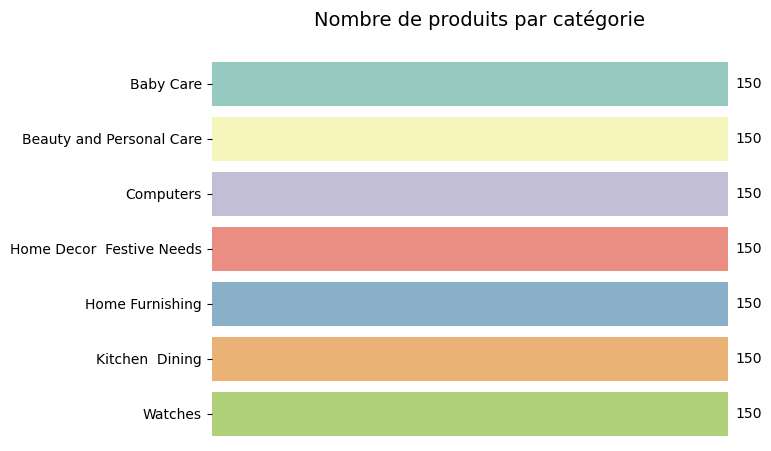

In [326]:
df_product_category = df_category.groupby("main_category").agg({"uniq_id" : "count"}).reset_index()

df_product_category.rename(columns = {"uniq_id":"nombre total"}, inplace=True)

y_values = df_product_category['main_category']
x_values = df_product_category['nombre total']


fig, ax = plt.subplots(figsize=(7,5))

ax = sns.barplot(x=x_values, y=y_values, data=df_product_category, palette="Set3")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

ax.set_title("Nombre de produits par catégorie \n", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(fontsize=10)
ax.axes.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)

Affichage des catégories de niveau 1

In [328]:
df_category['category_1'].unique()

array([' Curtains & Accessories ', ' Baby Bath & Skin ', ' Bed Linen ',
       ' Wrist Watches ', ' Living Room Furnishing ', ' Bath Linen ',
       ' Candles & Fragrances ', ' Tableware & Cutlery ', ' Lighting ',
       ' JMD Home Furnishing ', ' Infant Wear ',
       " Kripa's Home Furnishing ", ' Hair Care ', ' Coffee Mugs ',
       ' Network Components ', ' Tablet Accessories ', ' Cookware ',
       ' Laptop Accessories ', ' Makeup ', ' Combos and Kits ',
       ' Feeding & Nursing ', ' Baby Bedding ',
       ' Kitchen & Dining Linen ', ' Containers & Bottles ',
       ' Consumables & Disposables ', ' Wall Decor & Clocks ',
       ' Table Decor & Handicrafts ', ' Flowers, Plants & Vases ',
       ' Software ', ' Showpieces ', ' Furniture & Furnishings ',
       ' Decorative Lighting & Lamps ', ' Baby Grooming ',
       ' Computer Peripherals ', ' Cushions, Pillows & Covers ',
       ' Storage ', ' Health Care ', ' Body and Skin Care ',
       ' Kitchen Tools ', ' TRUE Home Decor & 

#### <font color='Blue'> **Nous exportons le dataframe des catégories** 

In [330]:
# Enregistrer le DataFrame résultant
df_category.to_csv('df_category.csv', index=False)

# <a name="C5"><font color='RoyalBlue'> 3. NLP (Natural Language Processing)</a>

## <a name="C6"><font color='Blue'> **3.1 Text Preprocessing**

***Prétraitement des données textuelles :***
****
- **Nettoyage des textes (suppression des stop-words, ponctuation, etc.), Stemming et Lemmatisation pour réduire les mots à leur forme de base et Tokenisation.**

- ***Nous créons une fonction pour mapper la balise POS (Part-Of-Speech) des mots (compatible avec la fonction de lemmatisation de WordNet, ce qui facilite la lemmatisation des mots) :C'est une étiquette qui indique la catégorie grammaticale d'un mot dans une phrase.***

In [335]:
def get_wordnet_pos(word):
    """Associe le tag POS à la première lettre que la fonction lemmatize() accepte"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

- ***Nous allons créer une fonction pour **lemmatiser** les mots de la description, en suivant ces étapes :***
*****
- Convertir le texte en minuscules.
- Supprimer les balises HTML ou XML (comme "{html}").
- Supprimer les URL (liens web).
- Supprimer les chiffres.
- Diviser le texte en tokens (mots individuels).
- Filtrer les mots courts et les stopwords (mots courants inutiles).
- Filtrer pour ne garder que les noms et les verbes.
- Lemmatiser les mots en utilisant WordNet, en fonction de leur catégorie grammaticale

In [337]:
# Initialiser le lemmatizer et tokenizer
lemmatizer = WordNetLemmatizer()
wnl = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')
stop_words = set(nltk_stopwords.words("english"))

# Mots vides
stop_words = set(nltk_stopwords.words("english"))

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}', "")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')
    tokens = tokenizer.tokenize(rem_num)
    tagged_words = nltk.pos_tag(tokens)
    filtered_words = [w for w, pos in tagged_words if len(w) > 2 and (pos.startswith('N') or pos.startswith('V')) and w not in stop_words]
    lemma_words = [wnl.lemmatize(w, get_wordnet_pos(w)) for w in filtered_words]
    return " ".join(lemma_words)

# Appliquer la fonction de prétraitement à la colonne description
df_category['lemmatizer_cat'] = df_category['description'].apply(preprocess)

In [338]:
# Initialiser le stemmer et le tokenizer
stemmer = EnglishStemmer()
w_tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')

# Ensemble de mots vides
stop_words = set(nltk_stopwords.words("english"))

def preprocess_stem(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}', "") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 and w not in stop_words]
    stem_words = [stemmer.stem(w) for w in filtered_words]
    return " ".join(stem_words)

# Appliquer la fonction pretraiter_stem à la colonne description
df_category['stemmed_cat'] = df_category['description'].apply(preprocess_stem)

In [339]:
df_category['lemmatizer_cat'].values[0]

'feature elegance polyester multicolor eyelet door curtain curtain elegance polyester multicolor eyelet door curtain pack price curtain enhances look interior curtain make quality polyester fabric feature eyelet style stitch metal ring make room environment love curtain wrinkle shrinkage apparance give home bright appeal design attention steal heart eyelet valance curtain slide draw thing morning welcome sun ray want wish morning world draw even create moment beauty give print bring home curtain filter room get amount specification elegance polyester multicolor eyelet door curtain pack brand elegance design door type eyelet model name polyester door curtain set model duster color multicolor dimension length box number content sale package pack sale package curtain material polyester'

## <a name="C7"><font color='Blue'>**3.2 Tokenizer**

In [341]:
df_category['tokenize_cat'] = df_category.apply(lambda x : w_tokenizer.tokenize(x['lemmatizer_cat']), axis = 1)
df_category['tokenize_cat'].values[0]

['feature',
 'elegance',
 'polyester',
 'multicolor',
 'eyelet',
 'door',
 'curtain',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'eyelet',
 'door',
 'curtain',
 'pack',
 'price',
 'curtain',
 'enhances',
 'look',
 'interior',
 'curtain',
 'make',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'love',
 'curtain',
 'wrinkle',
 'shrinkage',
 'apparance',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attention',
 'steal',
 'heart',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'draw',
 'thing',
 'morning',
 'welcome',
 'sun',
 'ray',
 'want',
 'wish',
 'morning',
 'world',
 'draw',
 'even',
 'create',
 'moment',
 'beauty',
 'give',
 'print',
 'bring',
 'home',
 'curtain',
 'filter',
 'room',
 'get',
 'amount',
 'specification',
 'elegance',
 'polyester',
 'multicolor',
 'eyelet',
 'door',
 'curtain',
 'pack',
 'brand',
 'elegance',
 'design',
 'door',
 'type',
 'eyelet',
 'model',
 'n

#### <font color='Blue'> **On applique le même procédé sur la colonne product_name**

In [343]:
df_category['lemmatizer_name'] = df_category['product_name'].apply(preprocess)

In [344]:
df_category['lemmatizer_name'].values[0]

'elegance polyester multicolor eyelet door curtain'

In [345]:
df_category['tokenize_name'] = df_category.apply(lambda x : w_tokenizer.tokenize(x['lemmatizer_name']), axis = 1)
df_category['tokenize_name'].values[0]

['elegance', 'polyester', 'multicolor', 'eyelet', 'door', 'curtain']

#### <font color='Blue'> **Fusionner les tokens des deux colonnes**

In [347]:
df_category['tokenize_name'] = df_category['tokenize_name'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df_category['tokenize_cat'] = df_category['tokenize_cat'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

df_category['tokenize'] = df_category['tokenize_name'] + ' ' + df_category['tokenize_cat']

df_category['tokenize'].values[0]

'elegance polyester multicolor eyelet door curtain feature elegance polyester multicolor eyelet door curtain curtain elegance polyester multicolor eyelet door curtain pack price curtain enhances look interior curtain make quality polyester fabric feature eyelet style stitch metal ring make room environment love curtain wrinkle shrinkage apparance give home bright appeal design attention steal heart eyelet valance curtain slide draw thing morning welcome sun ray want wish morning world draw even create moment beauty give print bring home curtain filter room get amount specification elegance polyester multicolor eyelet door curtain pack brand elegance design door type eyelet model name polyester door curtain set model duster color multicolor dimension length box number content sale package pack sale package curtain material polyester'

#### <font color='Blue'> **Nous mettons tous les mots de la colonne "tokenize" dans une liste afin de les compter**

In [349]:
text_total = []
for i in range(len(df_category['tokenize'])) : 
  text_total += df_category['tokenize'].values[i]

In [350]:
print('Nombre de mots de la colonne tokenize : ', len(text_total))
print('Nombre de mots UNIQUES de la colonne tokenize : ', len(set(text_total)))

Nombre de mots de la colonne tokenize :  299908
Nombre de mots UNIQUES de la colonne tokenize :  30


# <a name="C8"><font color='RoyalBlue'> 4. Approches NLP utilisées</a>

## <a name="C9"><font color='Blue'> **4.1 Première approche : Fréquentiste / Classique**</a>

***Cette approche se base sur des méthodes de traitement du langage naturel (NLP) classiques.***

### <a name="C10"><span style='background:PowderBlue'> 4.1.1 Vectorisation des Textes </a>

- ***Une fois le texte préparé, il doit être converti en représentation numérique pour pouvoir être traité par des algorithmes de machine learning. Les méthodes classiques incluent :***
*****
- <font color='Blue'>***CountVectorizer :*** Compte le nombre d'occurrences de chaque mot dans un document. Chaque document est représenté par un vecteur dont chaque composante correspond à un mot du vocabulaire.
*****
- Le CountVectorizer est un outil utilisé pour transformer du texte en données numériques, permettant ainsi aux algorithmes de traitement du langage naturel (NLP) de traiter efficacement les données textuelles. Voici comment il fonctionne généralement :
*****
- ***1. Collecte de données textuelles :*** Le CountVectorizer prend en entrée un ensemble de documents textuels, tels que des articles, des critiques, des commentaires ou tout autre type de texte.
- ***2. Tokenisation :*** Il divise chaque document en unités plus petites appelées "tokens". Les tokens sont généralement des mots, mais peuvent également être des phrases ou d'autres unités, selon la configuration choisie.
- ***3. Comptage des occurrences :*** Pour chaque document, le CountVectorizer compte le nombre de fois que chaque token apparaît. Il crée ainsi un vecteur numérique pour chaque document, où chaque élément du vecteur représente le nombre d'occurrences d'un token spécifique.
- ***4. Création d'une matrice :*** Enfin, il combine tous les vecteurs de documents pour former une matrice. Chaque ligne de cette matrice représente un document, tandis que chaque colonne représente un token unique présent dans l'ensemble de données.

*****
- <font color='Blue'>***TF-IDF (Term Frequency-Inverse Document Frequency) :*** Cette méthode pondère le nombre d'occurrences des mots par leur fréquence dans l'ensemble des documents, afin de donner plus de poids aux mots importants et de réduire l'importance des mots courants.

In [356]:
# Initialiser le CountVectorizer
count_vec = CountVectorizer()

# Vérifier que les documents ne sont pas vides après le prétraitement
df_category['tokenize_text'] = df_category['tokenize'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
non_empty_documents = df_category['tokenize_text'].str.strip() != ''

# Transformer les documents non vides en vecteurs
if non_empty_documents.sum() > 0:
    x = count_vec.fit_transform(df_category[non_empty_documents]['tokenize_text'])
    print(f"Nombre de documents transformés: {x.shape[0]}")
    print(f"Dimensions de la matrice de terme: {x.shape[1]}")
else:
    print("Tous les documents sont vides après prétraitement.")

Nombre de documents transformés: 1050
Dimensions de la matrice de terme: 3447


In [357]:
df_count_vec = pd.DataFrame(x.toarray(), columns=count_vec.get_feature_names_out())
df_count_vec

aapno  aari  ability  abkl_grn_grn_grn  abkl_pl_pl_pnk  abkl_pl_pnk_pnk  abode  abrasion  absolute  absorb  absorbency  absorbent  absorber  absorbs  abstract  abstrcts  accent  access  accessory  accident  accommodate  accomplishes  accord  acer  ache  aci  acid  acl  acne  act  actu  actx  acu  adaa  adapter  adaptor  add  addiction  addition  adf  adi  adidas  adino  adjust  adjusts  admiration  admire  adorn  adsl  advance  advice  aero  affect  afternoon  agarwood  age  ageless  agrees  agromech  aid  air  airport  airtel  airtex  airtight  akada  akshaj  akup  alarm  alcohol  aleo  alfajr  allin  allow  allows  alloy  alluminium  allure  almond  aloe  aloevera  alpha  alphabet  alrams  alter  alteration  altimeter  altitude  aluminium  aluminum  amaze  ambience  amit  ammonia  amnesia  amount  amp  amplifies  amplify  an  analog  analyzer  andre  andriod  angel  angelica  animal  animate  anise  anjeer  annoy  anodise  anodize  antenna  anthelios  anthill  anti  antique  \
0         0     0        0                 0               0                0      0         0         0       0           0          0         0        0         0         0       0       0          0         0            0             0       0     0     0    0     0    0     0    0     0     0    0     0        0        0    0          0         0    0    0       0      0       0        0           0       0      0     0        0       0     0       0          0         0    0        0       0         0    0    0        0       0       0         0      0       0     0      0        0     0       0      0      0       0      0           0       0       0     0         0      0         0       0      0           0          0         0          0         0      0         0     0        0        0       1    0          0        0   0       0         0      0        0      0         0       0        0      0       0      0        0        0        0          0        0     0        0   
1         0     0        0                 0               0                0      0         0         0       0           0          0         0        0         0         0       0       0          0         0            0             0       0     0     0    0     0    0     0    0     0     0    0     0        0        0    0          0         0    0    0       0      0       0        0           0       0      0     0        0       0     0       0          0         0    0        0       0         0    0    0        0       0       0         0      0       0     0      0        0     0       0      0      0       0      0           0       0       0     0         0      0         0       0      0           0          0         0          0         0      0         0     0        0        0       0    0          0        0   0       0         0      0        0      0         0       0        0      0       0      0        0        0        0          0        0     0        0   
2         0     0        0                 0               0                0      0         0         0       0           1          0         0        0         0         0       0       0          0         0            0             0       0     0     0    0     0    0     0    0     0     0    0     0        0        0    0          0         0    0    0       0      0       0        0           0       0      0     0        0       0     0       0          0         0    0        0       0         0    0    0        0       0       0         0      0       0     0      0        0     0       0      0      0       0      0           0       0       0     0         0      0         0       0      0           0          0         0          0         0      0         0     0        0        0       0    0          0        0   0       0         0      0        0      0         0       0        0      0       0      0        0        0        0          0        0     0        0   
3     

In [358]:
df_count_vec.values[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### <a name="C11"><span style='background:PowderBlue'> 4.1.2 PCA / T-SNE / K-Means</a>

***Une fois que le texte a été converti en une forme numérique via la vectorisation (avec CountVectorizer), il est souvent nécessaire de réduire la dimensionnalité des données pour diverses raisons, dont les suivantes :***

- **Réduction de la dimensionnalité :** Les vecteurs générés par CountVectorizer peuvent être très grands (chaque mot unique dans le corpus de texte correspond à une dimension). Cela rend les calculs coûteux et peut entraîner des problèmes de performance.

- **Visualisation :** La réduction de la dimensionnalité permet de projeter les données dans un espace de plus faible dimension (souvent 2D ou 3D), ce qui facilite la visualisation. Cela permet de mieux comprendre la structure des données et d'identifier des clusters potentiels ou des relations entre les données.

- **Suppression du bruit :** En réduisant la dimensionnalité, les techniques comme PCA (Principal Component Analysis) peuvent aider à supprimer le bruit et à conserver les dimensions les plus importantes, ce qui peut améliorer les performances des modèles d'apprentissage.
*****
- **Préparation au clustering :** Avant d'appliquer des algorithmes de clustering comme K-Means, il est souvent bénéfique de réduire la dimensionnalité des données. Les algorithmes de clustering fonctionnent mieux sur des données de plus faible dimension car ils sont moins affectés par la malédiction de la dimensionnalité.
****
***Nous réduisons les dimensions de cette matrice, en deux temps avec une ACP et une T-SNE, afin d'appliquer un k-means sur nos données textuelles.***

- La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
- L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [361]:
# Réduction de dimension avec PCA
print("Dimensions dataset avant réduction PCA : ", df_count_vec.shape)
pca = PCA(n_components=0.99)
feat_pca = pca.fit_transform(df_count_vec)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 3447)
Dimensions dataset après réduction PCA :  (1050, 615)


### <a name="C12"><span style='background:PowderBlue'> 4.1.3 Réduction de dimension en 2 composantes T-SNE</a>

La réduction de dimension en 2 composantes T-SNE (t-Distributed Stochastic Neighbor Embedding) est généralement effectuée après une première réduction de dimension par PCA (Principal Component Analysis)

Visualisation :

- **PCA :** PCA est utilisé pour réduire la dimensionnalité de très hautes dimensions à des dimensions plus gérables tout en conservant autant que possible la variance dans les données. Par exemple, réduire des milliers de dimensions à quelques dizaines.
- **T-SNE :** T-SNE est ensuite utilisé pour réduire les dimensions résultantes à 2 ou 3 dimensions pour la visualisation. T-SNE excelle à capturer les structures locales des données, ce qui le rend idéal pour la visualisation des clusters dans un espace bidimensionnel.

In [364]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne.shape)

(1050, 2)


In [365]:
df_tsne

,tsne1,tsne2
0,-33.616989,4.998405
1,-6.112313,-24.160429
2,-9.598941,-25.973450
3,0.880981,-19.251989
4,1.203542,-18.617847
...,...,...
1045,5.498331,32.048824
1046,11.422568,13.096110
1047,8.506041,11.710240
1048,11.801073,11.619840


#### <font color='Blue'>**On applique l'algorithme k-means**

In [367]:
# Appliquer l'algorithme K-Means
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=100, random_state=9)
kmeans.fit_transform(df_tsne)

array([[49.318798, 34.166832, 88.307205, ..., 16.91068 , 48.468052,
        46.49217 ],
       [48.35593 , 24.952518, 58.97177 , ..., 37.80411 ,  8.554907,
        69.251114],
       [51.476665, 27.739958, 62.696827, ..., 38.614685, 10.986517,
        70.961044],
       ...,
       [ 9.690276, 14.380082, 51.589203, ..., 26.595327, 41.35014 ,
        38.028503],
       [ 8.631982, 16.443865, 48.776432, ..., 29.890453, 41.987675,
        39.803944],
       [ 8.870038, 15.533966, 50.13053 , ..., 28.374111, 41.78261 ,
        38.8575  ]], dtype=float32)

In [368]:
# Attribuer des clusters aux données T-SNE
df_tsne['class'] = kmeans.labels_

In [369]:
df_tsne["Cluster_cat"] = df_category['Cluster_cat']

# Mapping des numéros de clusters aux noms des catégories
category_mapping = {
    0: "Baby Care",
    1: "Beauty and Personal Care",
    2: "Computers",
    3: "Home Decor & Festive Needs",
    4: "Home Furnishing",
    5: "Kitchen & Dining",
    6: "Watches"
}

# Remplacer les numéros de clusters par les noms des catégories
df_tsne['Category_name'] = df_tsne['Cluster_cat'].map(category_mapping)

df_tsne

,tsne1,tsne2,class,Cluster_cat,Category_name
0,-33.616989,4.998405,4,4,Home Furnishing
1,-6.112313,-24.160429,5,0,Baby Care
2,-9.598941,-25.973450,5,0,Baby Care
3,0.880981,-19.251989,5,4,Home Furnishing
4,1.203542,-18.617847,5,4,Home Furnishing
...,...,...,...,...,...
1045,5.498331,32.048824,0,0,Baby Care
1046,11.422568,13.096110,0,0,Baby Care
1047,8.506041,11.710240,0,0,Baby Care
1048,11.801073,11.619840,0,0,Baby Care


### <a name="C13"><span style='background:PowderBlue'> 4.1.4 Visualisation</a>

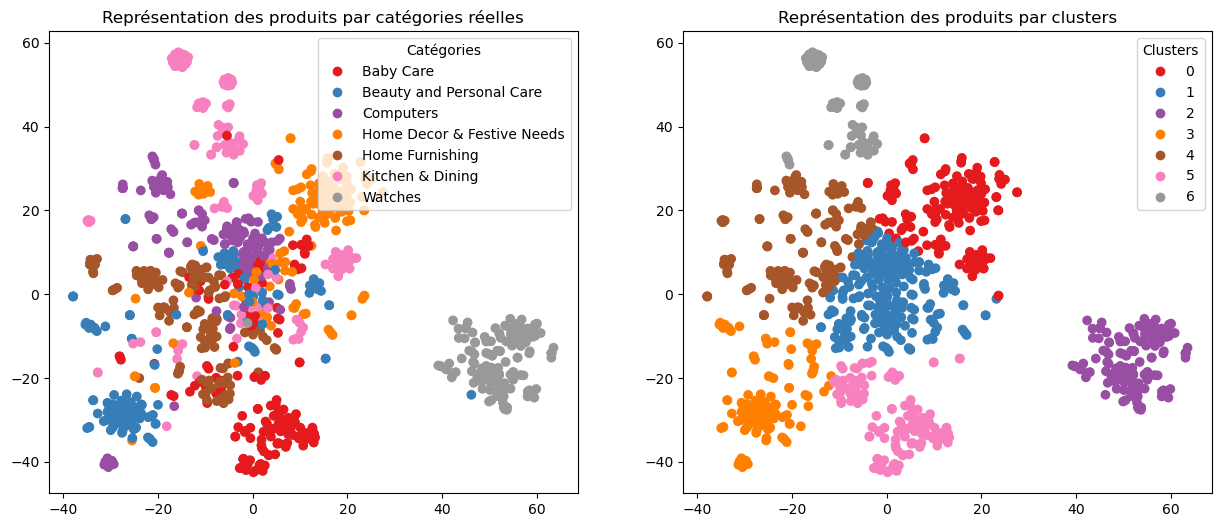

In [371]:
# Créer une figure de tracé
plt.figure(figsize=(15, 6))

# Noms des catégories réelles
category_names = [
    "Baby Care",
    "Beauty and Personal Care",
    "Computers",
    "Home Decor & Festive Needs",
    "Home Furnishing",
    "Kitchen & Dining",
    "Watches"
]

# Graphique des catégories réelles
plt.subplot(121)
# Création d'un colormap basé sur le nombre de catégories
cmap = plt.get_cmap('Set1', len(category_names))

# Assignation des couleurs en fonction de la catégorie
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['Cluster_cat'], cmap=cmap)
plt.title('Représentation des produits par catégories réelles')

# Création de la légende manuellement en utilisant la colormap
legend_handles = [plt.Line2D([0], [0], marker='o', color=cmap(i), linestyle='', label=category_names[i]) 
                  for i in range(len(category_names))]
plt.legend(handles=legend_handles, title="Catégories")

# Graphique des clusters K-Means
plt.subplot(122)
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['class'], cmap='Set1')
plt.title('Représentation des produits par clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")

# Afficher le graphique
plt.show()

### <a name="C14"><span style='background:PowderBlue'> 4.1.5 ARI Score</a>

***L'utilisation de l'ARI score dans permet de quantifier la qualité des clusters produits par K-means en les comparant aux catégories réelles des produits. Cela donne une mesure objective pour évaluer la performance de votre algorithme de clustering.***

In [374]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score

# Vérifiez si les colonnes existent dans le DataFrame
print(df_tsne.columns)

# Calcul de l'ARI score sans mapping manuel
try:
    ari_score = adjusted_rand_score(df_tsne['class'], df_tsne['Cluster_cat'])
    print('ARI score: ', ari_score)
except KeyError as e:
    print(f"Erreur: La colonne {e} n'existe pas dans le DataFrame.")


Index(['tsne1', 'tsne2', 'class', 'Cluster_cat', 'Category_name'], dtype='object')
ARI score:  0.3682184176146843


### <a name="C15"><span style='background:PowderBlue'> 4.1.6 Analyse des catégories (clusters de produits)</a>

<font color='Blue'>***Nous analysons l'analyse les clusters générés par l'algorithme de clustering  K-Means) en les comparant aux catégories réelles des produits.***

In [377]:
df_tsne.groupby("class").count()

,tsne1,tsne2,Cluster_cat,Category_name
class,,,,
0,161,161,161,161
1,224,224,224,224
2,150,150,150,150
3,126,126,126,126
4,177,177,177,177
5,132,132,132,132
6,80,80,80,80


In [378]:
def calculate_confusion_matrix(y_true, y_pred):
    # Liste des noms des catégories en fonction de leurs numéros de cluster
    categories = ["Baby Care", "Beauty and Personal Care", "Computers", 
                  "Home Decor & Festive Needs", "Home Furnishing", 
                  "Kitchen & Dining", "Watches"]

    # Calculer la matrice de confusion
    conf_mat = metrics.confusion_matrix(y_true, y_pred)

    # Utiliser les noms de catégories pour les lignes et les colonnes du DataFrame
    conf_mat_df = pd.DataFrame(conf_mat, index=[f'Actual {categories[i]}' for i in range(len(conf_mat))],
                               columns=[f'Predicted {categories[i]}' for i in range(len(conf_mat[0]))])

    # Calculer des métriques de classification supplémentaires
    classification_report = metrics.classification_report(y_true, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(classification_report).transpose()

    return conf_mat_df, class_report_df

In [379]:
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, confusion_matrix, classification_report

# Convertir les catégories réelles en entiers
df_tsne['Cluster_cat'] = df_tsne['Cluster_cat'].astype(int)

# Convertir les clusters prédits en entiers
df_tsne['class'] = df_tsne['class'].astype(int)

# Noms des catégories
categories = ["Baby Care", "Beauty and Personal Care", "Computers", 
              "Home Decor & Festive Needs", "Home Furnishing", 
              "Kitchen & Dining", "Watches"]

# Calculer la matrice de confusion et le rapport de classification
confusion_matrix_df, classification_report_df = calculate_confusion_matrix(df_tsne['Cluster_cat'], df_tsne['class'])

# Afficher la matrice de confusion
print("Matrice de confusion :")
confusion_matrix_df

Matrice de confusion :


,Predicted Baby Care,Predicted Beauty and Personal Care,Predicted Computers,Predicted Home Decor & Festive Needs,Predicted Home Furnishing,Predicted Kitchen & Dining,Predicted Watches
Actual Baby Care,10,26,0,8,4,101,1
Actual Beauty and Personal Care,7,45,1,82,12,3,0
Actual Computers,13,52,0,11,69,0,5
Actual Home Decor & Festive Needs,100,29,0,8,12,1,0
Actual Home Furnishing,0,49,0,6,68,27,0
Actual Kitchen & Dining,31,22,0,11,12,0,74
Actual Watches,0,1,149,0,0,0,0


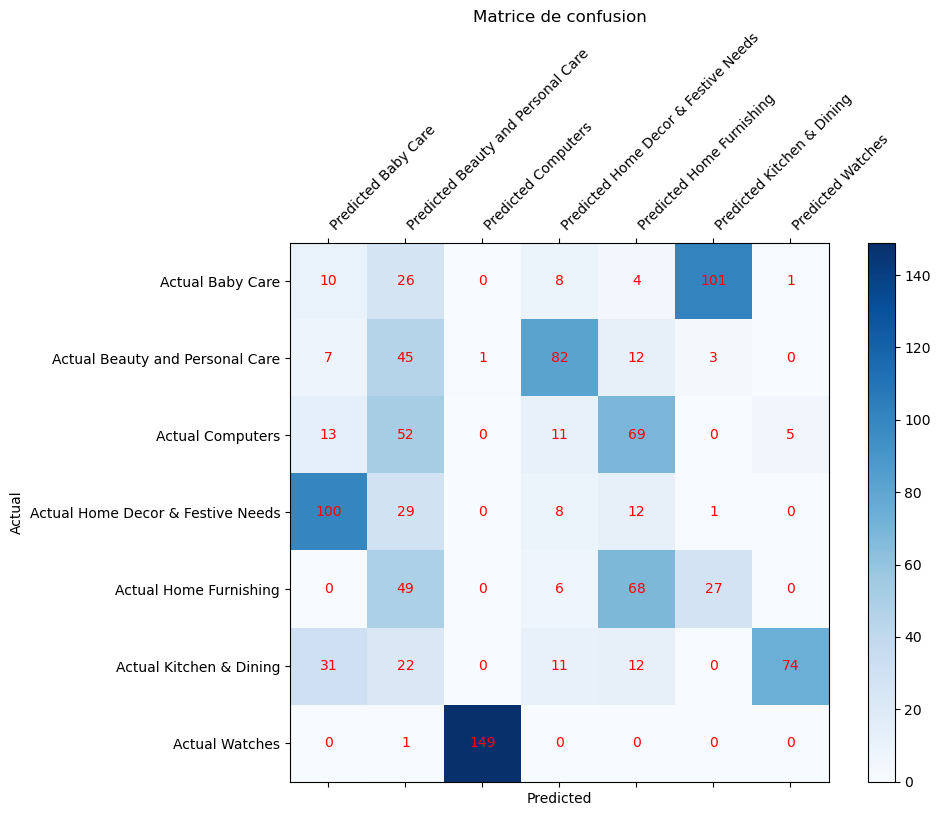

Rapport de classification :
              precision    recall  f1-score      support
0              0.062112  0.066667  0.064309   150.000000
1              0.200893  0.300000  0.240642   150.000000
2              0.000000  0.000000  0.000000   150.000000
3              0.063492  0.053333  0.057971   150.000000
4              0.384181  0.453333  0.415902   150.000000
5              0.000000  0.000000  0.000000   150.000000
6              0.000000  0.000000  0.000000   150.000000
accuracy       0.124762  0.124762  0.124762     0.124762
macro avg      0.101525  0.124762  0.111261  1050.000000
weighted avg   0.101525  0.124762  0.111261  1050.000000


In [380]:
# Afficher la matrice de confusion avec matplotlib
def plot_confusion_matrix(conf_mat, categories):
    fig, ax = plt.subplots(figsize=(10, 7))
    cax = ax.matshow(conf_mat, cmap='Blues')
    fig.colorbar(cax)

    for (i, j), value in np.ndenumerate(conf_mat):
        ax.text(j, i, f'{value}', ha='center', va='center', color='red')

    ax.set_xticks(np.arange(len(categories)))
    ax.set_yticks(np.arange(len(categories)))
    ax.set_xticklabels([f'Predicted {category}' for category in categories], rotation=45, ha='left')
    ax.set_yticklabels([f'Actual {category}' for category in categories])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matrice de confusion')
    plt.show()

# Afficher la matrice de confusion
plot_confusion_matrix(confusion_matrix_df.values, categories)

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report_df)

### <a name="C16"><span style='background:PowderBlue'> 4.1.7 TF-IDF (term frequency-inverse document frequency)</a>

#### <font color='Blue'>**Étape 1 : Calculer les TF-IDF des textes**</a>

In [383]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Calculer les TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_category['tokenize_text'])

# Convertir en DataFrame
df_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

#### <font color='Blue'>**Étape 2 : Réduire la dimensionnalité avec PCA**</a>

In [385]:
from sklearn.decomposition import PCA

print("Dimensions dataset avant réduction PCA : ", df_tfidf.shape)
pca = PCA(n_components=0.99)
feat_pca = pca.fit_transform(df_tfidf)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 3447)
Dimensions dataset après réduction PCA :  (1050, 767)


#### <font color='Blue'>**Étape 3 : Appliquer t-SNE pour visualiser les données en 2D**</a>

In [387]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=['tsne1', 'tsne2'])
print(df_tsne.shape)

(1050, 2)


#### <font color='Blue'>**Étape 4 : Effectuer un clustering avec K-Means**</a>

In [389]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, init='k-means++', n_init=100, random_state=9)
kmeans.fit(df_tsne)
df_tsne['class'] = kmeans.labels_
df_tsne["Cluster_cat"] = df_category['Cluster_cat']

In [390]:
# Mapping des numéros de clusters aux noms des catégories
category_mapping = {
    0: "Baby Care",
    1: "Beauty and Personal Care",
    2: "Computers",
    3: "Home Decor & Festive Needs",
    4: "Home Furnishing",
    5: "Kitchen & Dining",
    6: "Watches"
}

# Remplacer les numéros de clusters par les noms des catégories
df_tsne['Category_name'] = df_tsne['Cluster_cat'].map(category_mapping)

df_tsne

,tsne1,tsne2,class,Cluster_cat,Category_name
0,-35.844379,-14.382048,2,4,Home Furnishing
1,-12.663228,14.830570,1,0,Baby Care
2,-8.582314,15.609204,1,0,Baby Care
3,-30.037371,-2.028859,2,4,Home Furnishing
4,-29.494827,-2.086430,2,4,Home Furnishing
...,...,...,...,...,...
1045,10.447028,21.578211,6,0,Baby Care
1046,8.632365,20.124454,6,0,Baby Care
1047,7.584184,16.841461,1,0,Baby Care
1048,9.260666,18.115120,6,0,Baby Care


#### <font color='Blue'>**Visualisation**</a>

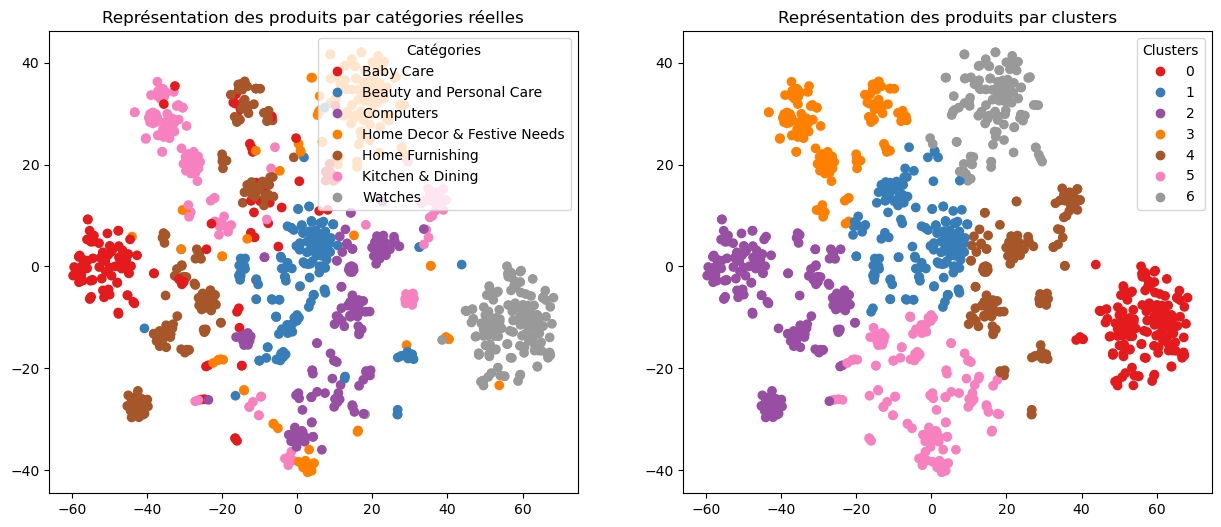

In [392]:
# Créer une figure de tracé
plt.figure(figsize=(15, 6))

# Noms des catégories réelles
category_names = [
    "Baby Care",
    "Beauty and Personal Care",
    "Computers",
    "Home Decor & Festive Needs",
    "Home Furnishing",
    "Kitchen & Dining",
    "Watches"
]

# Graphique des catégories réelles
plt.subplot(121)
# Création d'un colormap basé sur le nombre de catégories
cmap = plt.get_cmap('Set1', len(category_names))

# Assignation des couleurs en fonction de la catégorie
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['Cluster_cat'], cmap=cmap)
plt.title('Représentation des produits par catégories réelles')

# Création de la légende manuellement en utilisant la colormap
legend_handles = [plt.Line2D([0], [0], marker='o', color=cmap(i), linestyle='', label=category_names[i]) 
                  for i in range(len(category_names))]
plt.legend(handles=legend_handles, title="Catégories")

# Graphique des clusters K-Means
plt.subplot(122)
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['class'], cmap='Set1')
plt.title('Représentation des produits par clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")

# Afficher le graphique
plt.show()

In [393]:
# Calcul de l'ARI score 
try:
    ari_score = adjusted_rand_score(df_tsne['class'], df_tsne['Cluster_cat'])
    print('ARI score: ', ari_score)
except KeyError as e:
    print(f"Erreur: La colonne {e} n'existe pas dans le DataFrame.")

ARI score:  0.45421241736553664


#### <font color='Blue'>**Analyse des classes**</a>

In [395]:
df_tsne.groupby("class").count()

,tsne1,tsne2,Cluster_cat,Category_name
class,,,,
0,154,154,154,154
1,169,169,169,169
2,193,193,193,193
3,134,134,134,134
4,134,134,134,134
5,145,145,145,145
6,121,121,121,121


In [396]:
# Convertir les catégories réelles en entiers
df_tsne['Cluster_cat'] = df_tsne['Cluster_cat'].astype(int)

# Convertir les clusters prédits en entiers
df_tsne['class'] = df_tsne['class'].astype(int)

# Calculer la matrice de confusion et le rapport de classification
confusion_matrix_df, classification_report_df = calculate_confusion_matrix(df_tsne['Cluster_cat'], df_tsne['class'])

# Afficher la matrice de confusion
print("Matrice de confusion :")
confusion_matrix_df

Matrice de confusion :


,Predicted Baby Care,Predicted Beauty and Personal Care,Predicted Computers,Predicted Home Decor & Festive Needs,Predicted Home Furnishing,Predicted Kitchen & Dining,Predicted Watches
Actual Baby Care,0,25,95,11,0,8,11
Actual Beauty and Personal Care,1,100,2,0,15,31,1
Actual Computers,0,2,0,0,80,68,0
Actual Home Decor & Festive Needs,4,7,2,4,4,22,107
Actual Home Furnishing,0,21,93,36,0,0,0
Actual Kitchen & Dining,0,14,1,83,35,15,2
Actual Watches,149,0,0,0,0,1,0


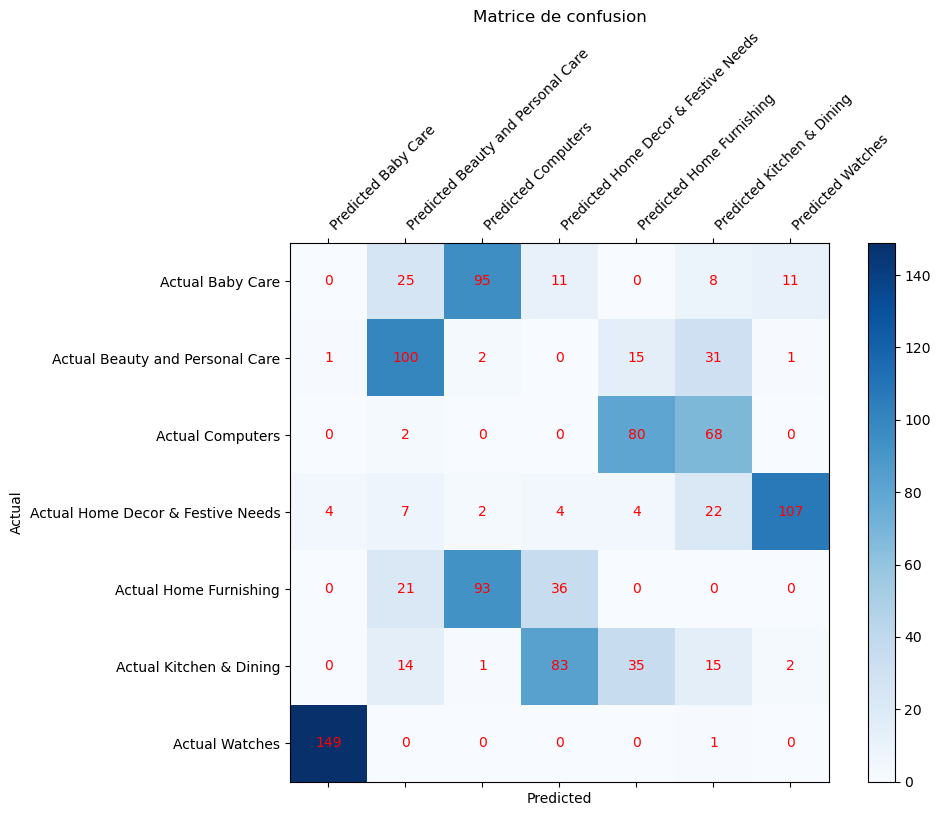

Rapport de classification :
              precision    recall  f1-score      support
0              0.000000  0.000000  0.000000   150.000000
1              0.591716  0.666667  0.626959   150.000000
2              0.000000  0.000000  0.000000   150.000000
3              0.029851  0.026667  0.028169   150.000000
4              0.000000  0.000000  0.000000   150.000000
5              0.103448  0.100000  0.101695   150.000000
6              0.000000  0.000000  0.000000   150.000000
accuracy       0.113333  0.113333  0.113333     0.113333
macro avg      0.103574  0.113333  0.108118  1050.000000
weighted avg   0.103574  0.113333  0.108118  1050.000000


In [397]:
# Afficher la matrice de confusion avec matplotlib
def plot_confusion_matrix(conf_mat, categories):
    fig, ax = plt.subplots(figsize=(10, 7))
    cax = ax.matshow(conf_mat, cmap='Blues')
    fig.colorbar(cax)

    for (i, j), value in np.ndenumerate(conf_mat):
        ax.text(j, i, f'{value}', ha='center', va='center', color='red')

    ax.set_xticks(np.arange(len(categories)))
    ax.set_yticks(np.arange(len(categories)))
    ax.set_xticklabels([f'Predicted {category}' for category in categories], rotation=45, ha='left')
    ax.set_yticklabels([f'Actual {category}' for category in categories])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matrice de confusion')
    plt.show()

# Afficher la matrice de confusion
plot_confusion_matrix(confusion_matrix_df.values, categories)

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report_df)

## <a name="C17"><font color='Blue'> **4.2 Deuxième approche : Embedding** </a>

### <a name="C18"><span style='background:PowderBlue'> 4.2.1 Word2Vec </a>

In [400]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Initialisation du tokenizer et des stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

# Fonction de tokenisation
def tokenize(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Appliquer la tokenisation à la colonne 'description'
df_category['tokenize'] = df_category['description'].apply(tokenize)

# Calculer la longueur moyenne des descriptions et noms de produits
df_category['word_count'] = df_category['tokenize'].apply(len)
average_word_count = df_category['word_count'].mean()
print(average_word_count)


58.843809523809526


In [401]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=50
maxlen = 38 # adapt to length of sentences
sentences = df_category['tokenize'].to_list()

In [402]:
import gensim
import multiprocessing

# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 5966
Word2Vec trained


In [403]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Préparation des sentences (tokenization)
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                            maxlen=maxlen,
                            padding='post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5967


Creating the embedding matrix

In [405]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (5967, 300)


In [406]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.47765362,  1.02393043,  0.38314173, ..., -1.62897992,
         0.19043453, -0.07736155],
       [-0.13980651,  0.89056838, -0.45679173, ..., -0.0941999 ,
        -0.01397088,  1.05042481],
       ...,
       [ 0.06082611, -0.05499863, -0.06740005, ..., -0.01645949,
         0.03625361,  0.04992734],
       [ 0.03816661, -0.04465161, -0.04565272, ..., -0.02629057,
         0.0034609 ,  0.03232423],
       [ 0.04411136,  0.15421695,  0.01059403, ..., -0.09352578,
         0.06615909, -0.00416517]])

#### <font color='Blue'> **Création embedding model**</a>

In [408]:
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# Création du modèle
input_length = maxlen

word_input = Input(shape=(input_length,), dtype='float64')
word_embedding = Embedding(input_dim=vocab_size,
                           output_dim=w2v_size,
                           weights=[embedding_matrix],
                           input_length=input_length)(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)
embed_model = Model(inputs=[word_input], outputs=word_vec)

embed_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 38, 300)        │     1,790,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 300)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,100 (6.83 MB)

 Trainable params: 1,790,100 (6.83 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color='Blue'> **Télechargement du modèle**

In [410]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(1050, 300)

embeddings

#### <font color='Blue'> **PCA / T-SNE / K-Means**

In [413]:
print("Dimensions dataset avant réduction PCA : ", embeddings.shape)
pca = PCA(n_components=0.99)
feat_pca= pca.fit_transform(embeddings)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 300)
Dimensions dataset après réduction PCA :  (1050, 29)


In [414]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(embeddings)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne.shape)

(1050, 2)


In [415]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=100, random_state=9)
kmeans.fit_transform(df_tsne)

array([[53.074165 , 32.655586 , 68.525055 , ...,  7.6020594, 45.26895  ,
        20.930069 ],
       [50.104355 , 29.372437 , 64.52397  , ...,  3.598096 , 40.95199  ,
        24.869167 ],
       [49.68505  , 29.523895 , 64.2008   , ...,  3.6988516, 40.82232  ,
        25.1901   ],
       ...,
       [16.339003 , 58.91363  , 12.340765 , ..., 56.79568  , 37.398125 ,
        82.65887  ],
       [16.729885 , 59.54822  , 12.088819 , ..., 57.496918 , 37.931637 ,
        83.355    ],
       [16.545223 , 58.80757  , 12.114753 , ..., 56.79642  , 37.23683  ,
        82.68757  ]], dtype=float32)

In [416]:
df_tsne['class'] = kmeans.labels_

In [417]:
df_tsne["Cluster_cat"] = df_category['Cluster_cat']

# Mapping des numéros de clusters aux noms des catégories
category_mapping = {
    0: "Baby Care",
    1: "Beauty and Personal Care",
    2: "Computers",
    3: "Home Decor & Festive Needs",
    4: "Home Furnishing",
    5: "Kitchen & Dining",
    6: "Watches"
}

# Remplacer les numéros de clusters par les noms des catégories
df_tsne['Category_name'] = df_tsne['Cluster_cat'].map(category_mapping)

df_tsne

,tsne1,tsne2,class,Cluster_cat,Category_name
0,27.200764,-6.321880,4,4,Home Furnishing
1,23.664972,-3.802786,4,0,Baby Care
2,23.286686,-4.027416,4,0,Baby Care
3,19.640011,-11.811066,4,4,Home Furnishing
4,19.537849,-12.138227,4,4,Home Furnishing
...,...,...,...,...,...
1045,17.867138,18.547441,1,0,Baby Care
1046,18.353079,16.773098,1,0,Baby Care
1047,-34.396294,-1.751472,2,0,Baby Care
1048,-35.097237,-1.772411,2,0,Baby Care


#### <font color='Blue'> **Visualisation**

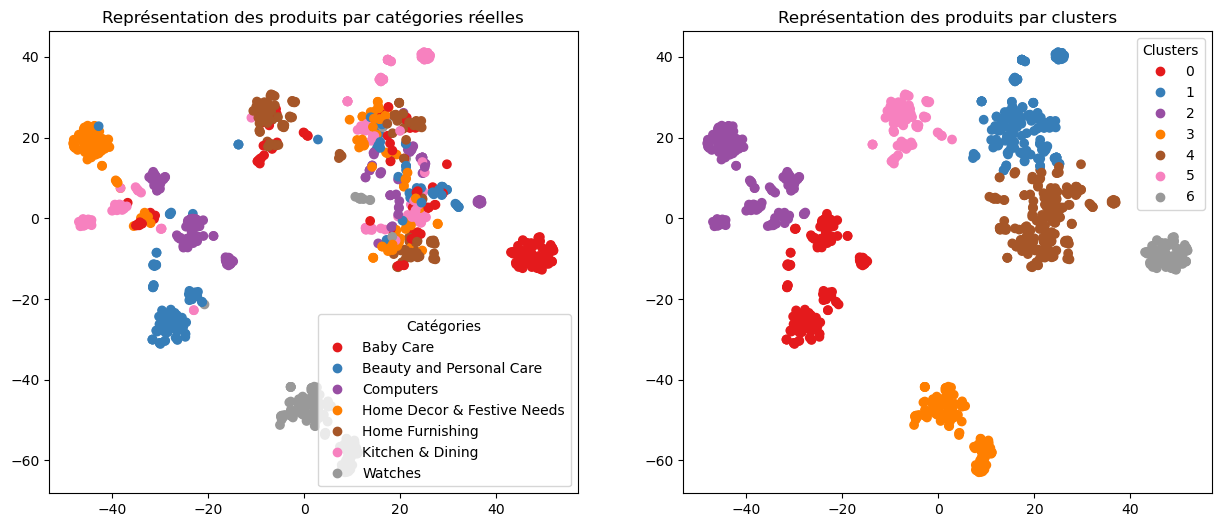

In [419]:
# Créer une figure de tracé
plt.figure(figsize=(15, 6))

# Noms des catégories réelles
category_names = [
    "Baby Care",
    "Beauty and Personal Care",
    "Computers",
    "Home Decor & Festive Needs",
    "Home Furnishing",
    "Kitchen & Dining",
    "Watches"
]

# Graphique des catégories réelles
plt.subplot(121)
# Création d'un colormap basé sur le nombre de catégories
cmap = plt.get_cmap('Set1', len(category_names))

# Assignation des couleurs en fonction de la catégorie
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['Cluster_cat'], cmap=cmap)
plt.title('Représentation des produits par catégories réelles')

# Création de la légende manuellement en utilisant la colormap
legend_handles = [plt.Line2D([0], [0], marker='o', color=cmap(i), linestyle='', label=category_names[i]) 
                  for i in range(len(category_names))]
plt.legend(handles=legend_handles, title="Catégories")

# Graphique des clusters K-Means
plt.subplot(122)
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['class'], cmap='Set1')
plt.title('Représentation des produits par clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")

# Afficher le graphique
plt.show()

#### <font color='Blue'> **ARI Score**

In [421]:
# Calcul de l'ARI score sans mapping manuel
try:
    ari_score = adjusted_rand_score(df_tsne['class'], df_tsne['Cluster_cat'])
    print('ARI score: ', ari_score)
except KeyError as e:
    print(f"Erreur: La colonne {e} n'existe pas dans le DataFrame.")

ARI score:  0.2956740286483064


#### <font color='Blue'> **Analyse de classes**</a>

In [423]:
df_tsne.groupby("class").count()

,tsne1,tsne2,Cluster_cat,Category_name
class,,,,
0,173,173,173,173
1,188,188,188,188
2,163,163,163,163
3,133,133,133,133
4,215,215,215,215
5,104,104,104,104
6,74,74,74,74


In [424]:
# Convertir les catégories réelles en entiers
df_tsne['Cluster_cat'] = df_tsne['Cluster_cat'].astype(int)

# Convertir les clusters prédits en entiers
df_tsne['class'] = df_tsne['class'].astype(int)

# Calculer la matrice de confusion et le rapport de classification
confusion_matrix_df, classification_report_df = calculate_confusion_matrix(df_tsne['Cluster_cat'], df_tsne['class'])

# Afficher la matrice de confusion
print("Matrice de confusion :")
confusion_matrix_df

Matrice de confusion :


,Predicted Baby Care,Predicted Beauty and Personal Care,Predicted Computers,Predicted Home Decor & Festive Needs,Predicted Home Furnishing,Predicted Kitchen & Dining,Predicted Watches
Actual Baby Care,0,12,14,0,25,25,74
Actual Beauty and Personal Care,96,14,5,0,31,4,0
Actual Computers,70,25,24,0,31,0,0
Actual Home Decor & Festive Needs,0,37,76,0,37,0,0
Actual Home Furnishing,0,32,0,0,44,74,0
Actual Kitchen & Dining,6,63,44,0,36,1,0
Actual Watches,1,5,0,133,11,0,0


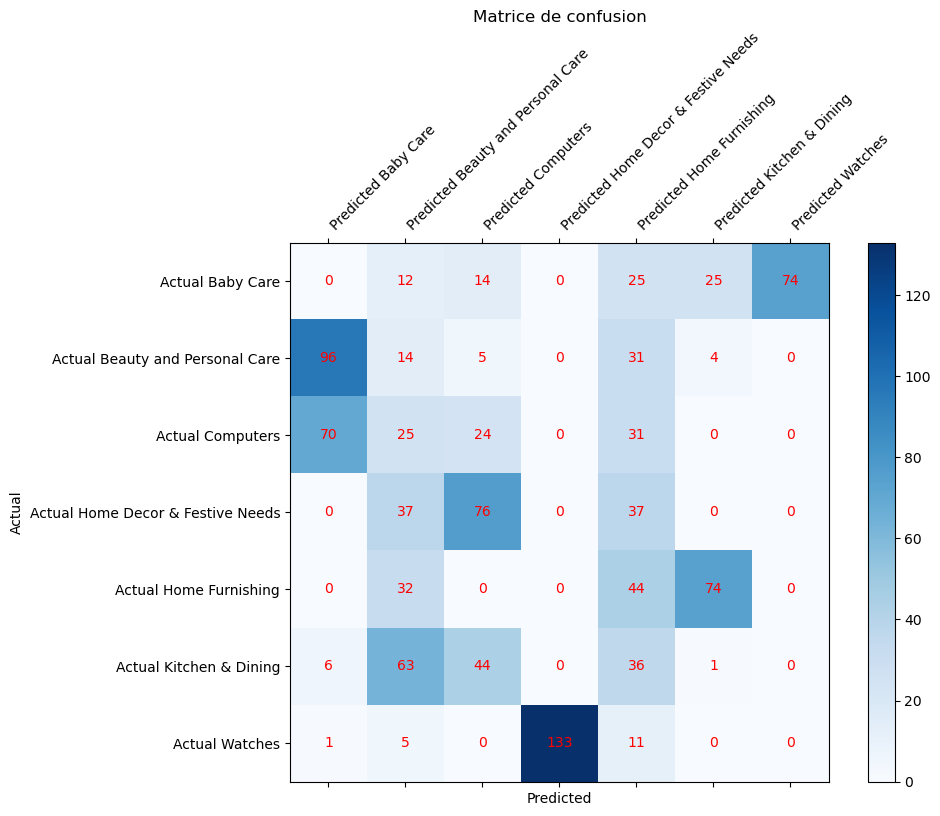

Rapport de classification :
              precision    recall  f1-score      support
0              0.000000  0.000000  0.000000   150.000000
1              0.074468  0.093333  0.082840   150.000000
2              0.147239  0.160000  0.153355   150.000000
3              0.000000  0.000000  0.000000   150.000000
4              0.204651  0.293333  0.241096   150.000000
5              0.009615  0.006667  0.007874   150.000000
6              0.000000  0.000000  0.000000   150.000000
accuracy       0.079048  0.079048  0.079048     0.079048
macro avg      0.062282  0.079048  0.069309  1050.000000
weighted avg   0.062282  0.079048  0.069309  1050.000000


In [425]:
# Afficher la matrice de confusion avec matplotlib
def plot_confusion_matrix(conf_mat, categories):
    fig, ax = plt.subplots(figsize=(10, 7))
    cax = ax.matshow(conf_mat, cmap='Blues')
    fig.colorbar(cax)

    for (i, j), value in np.ndenumerate(conf_mat):
        ax.text(j, i, f'{value}', ha='center', va='center', color='red')

    ax.set_xticks(np.arange(len(categories)))
    ax.set_yticks(np.arange(len(categories)))
    ax.set_xticklabels([f'Predicted {category}' for category in categories], rotation=45, ha='left')
    ax.set_yticklabels([f'Actual {category}' for category in categories])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matrice de confusion')
    plt.show()

# Afficher la matrice de confusion
plot_confusion_matrix(confusion_matrix_df.values, categories)

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report_df)

### <a name="C19"><span style='background:PowderBlue'> 4.2.2 BERT </a>

#### <font color='Blue'> **Fonctions communes**

In [428]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF'):
    batch_size = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    all_last_hidden_states = []

    for step in range(0, len(sentences), batch_size):
        batch_sentences = sentences[step:step + batch_size]
        input_ids, token_type_ids, attention_mask, _ = bert_inp_fct(batch_sentences, bert_tokenizer, max_length)

        if mode == 'HF':
            outputs = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
            last_hidden_states = outputs.last_hidden_state
            all_last_hidden_states.append(last_hidden_states)

        elif mode == 'TFhub':
            text_preprocessed = {"input_word_ids": input_ids, "input_mask": attention_mask, "input_type_ids": token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
            all_last_hidden_states.append(last_hidden_states.numpy())

    # Concaténation des états cachés et calcul des features
    last_hidden_states_tot = np.concatenate(all_last_hidden_states, axis=0)
    features_bert = last_hidden_states_tot.mean(axis=1)

    time2 = np.round(time.time() - time1, 0)
    print("Temps de traitement : ", time2)

    return features_bert, last_hidden_states_tot

#### <font color='Blue'> **BERT HuggingFace : Creation des features**

In [430]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFBertModel.from_pretrained(model_type)
sentences = df_category['tokenize'].to_list()


loading configuration file config.json from cache at C:\Users\samir\.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at C:\Users\samir\.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\model.safetensors
Loaded 109,48

In [431]:
sentences[0]

['key',
 'features',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'height',
 'pack',
 '2',
 'price',
 'rs',
 '899',
 'curtain',
 'enhances',
 'look',
 'interiors',
 'curtain',
 'made',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'features',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'makes',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'designs',
 'surreal',
 'attention',
 'sure',
 'steal',
 'hearts',
 'contemporary',
 'eyelet',
 'valance',
 'curtains',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'rays',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create

In [432]:
import time
# Création des features
sentences = [" ".join(sentence) if isinstance(sentence, list) else sentence for sentence in sentences]

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\samir\.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\samir\.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\vocab.t

Temps de traitement :  193.0


In [433]:
features_bert

array([[ 0.03792714, -0.07536554,  0.7297971 , ..., -0.12256815,
        -0.00219249, -0.13224705],
       [ 0.10258124, -0.03423684,  0.4513934 , ..., -0.24018843,
        -0.20924936,  0.16042638],
       [ 0.15712821, -0.05135721,  0.6171271 , ..., -0.22420497,
        -0.28484157, -0.08026958],
       ...,
       [ 0.08751977, -0.06769998,  0.44060388, ..., -0.0918377 ,
        -0.0394877 , -0.19170694],
       [ 0.15885644, -0.06467024,  0.3571214 , ...,  0.14768891,
        -0.09700489, -0.36986914],
       [ 0.20097612, -0.16728519,  0.4102831 , ...,  0.08083974,
        -0.06144328, -0.2707796 ]], dtype=float32)

#### <font color='Blue'> **BERT Hugging face : PCA / T-SNE / K-Means**

In [435]:
print("Dimensions dataset avant réduction PCA : ", features_bert.shape)
pca = PCA(n_components=0.99)
feat_pca= pca.fit_transform(features_bert)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 768)
Dimensions dataset après réduction PCA :  (1050, 318)


In [436]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(features_bert)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne.shape)

(1050, 2)


In [437]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=100, random_state=9)
kmeans.fit_transform(df_tsne)
df_tsne['class'] = kmeans.labels_
df_tsne["Cluster_cat"] = df_category['Cluster_cat']

# Mapping des numéros de clusters aux noms des catégories
category_mapping = {
    0: "Baby Care",
    1: "Beauty and Personal Care",
    2: "Computers",
    3: "Home Decor & Festive Needs",
    4: "Home Furnishing",
    5: "Kitchen & Dining",
    6: "Watches"
}

# Remplacer les numéros de clusters par les noms des catégories
df_tsne['Category_name'] = df_tsne['Cluster_cat'].map(category_mapping)

#### <font color='Blue'> **BERT Hugging face : Visualisation**

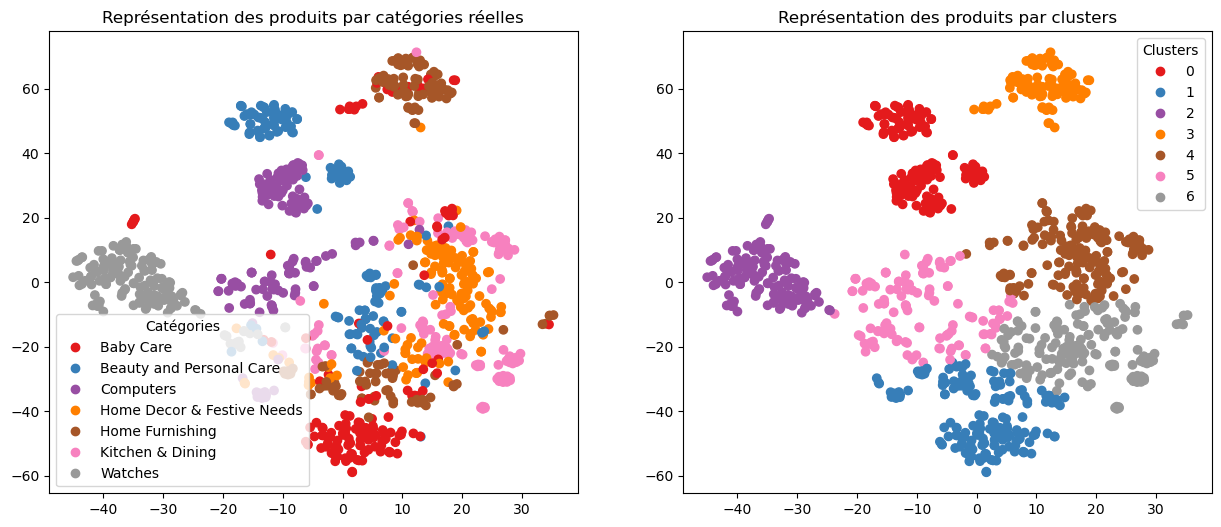

In [439]:
# Créer une figure de tracé
plt.figure(figsize=(15, 6))

# Noms des catégories réelles
category_names = [
    "Baby Care",
    "Beauty and Personal Care",
    "Computers",
    "Home Decor & Festive Needs",
    "Home Furnishing",
    "Kitchen & Dining",
    "Watches"
]

# Graphique des catégories réelles
plt.subplot(121)
# Création d'un colormap basé sur le nombre de catégories
cmap = plt.get_cmap('Set1', len(category_names))

# Assignation des couleurs en fonction de la catégorie
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['Cluster_cat'], cmap=cmap)
plt.title('Représentation des produits par catégories réelles')

# Création de la légende manuellement en utilisant la colormap
legend_handles = [plt.Line2D([0], [0], marker='o', color=cmap(i), linestyle='', label=category_names[i]) 
                  for i in range(len(category_names))]
plt.legend(handles=legend_handles, title="Catégories")

# Graphique des clusters K-Means
plt.subplot(122)
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['class'], cmap='Set1')
plt.title('Représentation des produits par clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")

# Afficher le graphique
plt.show()

#### <font color='Blue'> **BERT Hugging face : ARI Score**

In [441]:
# Calcul de l'ARI score 
try:
    ari_score = adjusted_rand_score(df_tsne['class'], df_tsne['Cluster_cat'])
    print('ARI score: ', ari_score)
except KeyError as e:
    print(f"Erreur: La colonne {e} n'existe pas dans le DataFrame.")

ARI score:  0.3575565989089519


#### <font color='Blue'> **BERT Hugging face : Class analysis**

In [443]:
df_tsne.groupby("class").count()

,tsne1,tsne2,Cluster_cat,Category_name
class,,,,
0,151,151,151,151
1,175,175,175,175
2,140,140,140,140
3,98,98,98,98
4,176,176,176,176
5,130,130,130,130
6,180,180,180,180


In [444]:
# Convertir les catégories réelles en entiers
df_tsne['Cluster_cat'] = df_tsne['Cluster_cat'].astype(int)

# Convertir les clusters prédits en entiers
df_tsne['class'] = df_tsne['class'].astype(int)

# Calculer la matrice de confusion et le rapport de classification
confusion_matrix_df, classification_report_df = calculate_confusion_matrix(df_tsne['Cluster_cat'], df_tsne['class'])

# Afficher la matrice de confusion
print("Matrice de confusion :")
confusion_matrix_df

Matrice de confusion :


,Predicted Baby Care,Predicted Beauty and Personal Care,Predicted Computers,Predicted Home Decor & Festive Needs,Predicted Home Furnishing,Predicted Kitchen & Dining,Predicted Watches
Actual Baby Care,0,99,5,20,13,5,8
Actual Beauty and Personal Care,81,2,0,0,20,26,21
Actual Computers,68,12,0,0,8,62,0
Actual Home Decor & Festive Needs,0,10,0,1,81,5,53
Actual Home Furnishing,0,50,0,76,1,0,23
Actual Kitchen & Dining,2,2,0,1,53,17,75
Actual Watches,0,0,135,0,0,15,0


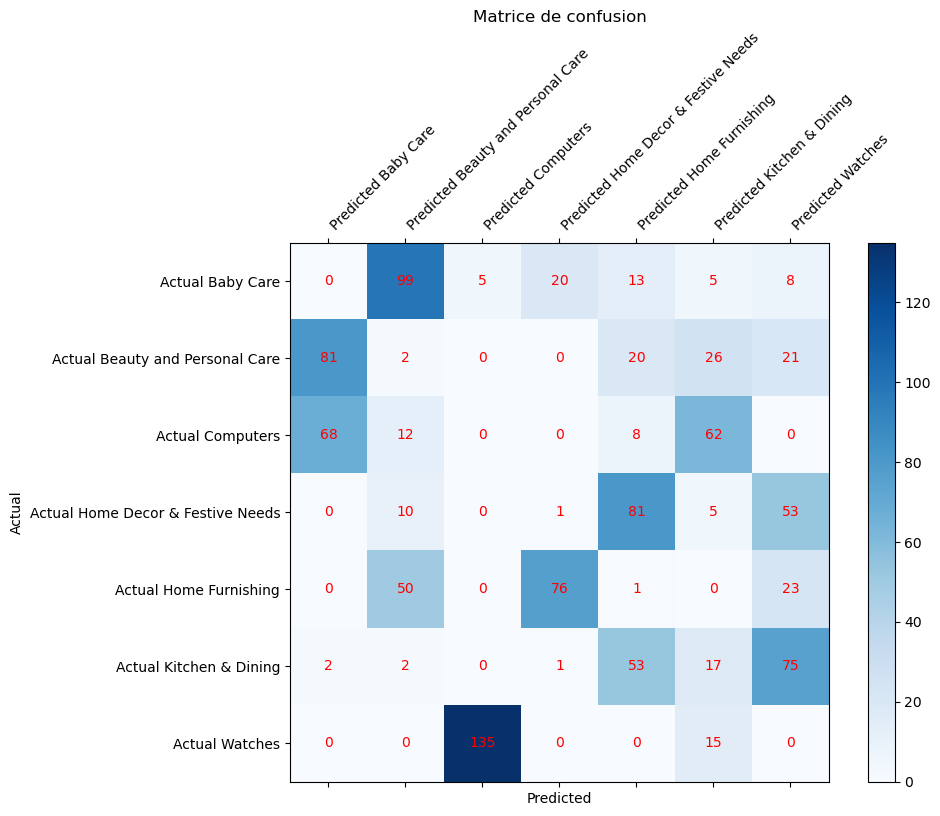

Rapport de classification :
              precision    recall  f1-score  support
0              0.000000  0.000000  0.000000   150.00
1              0.011429  0.013333  0.012308   150.00
2              0.000000  0.000000  0.000000   150.00
3              0.010204  0.006667  0.008065   150.00
4              0.005682  0.006667  0.006135   150.00
5              0.130769  0.113333  0.121429   150.00
6              0.000000  0.000000  0.000000   150.00
accuracy       0.020000  0.020000  0.020000     0.02
macro avg      0.022583  0.020000  0.021134  1050.00
weighted avg   0.022583  0.020000  0.021134  1050.00


In [445]:
# Afficher la matrice de confusion avec matplotlib
def plot_confusion_matrix(conf_mat, categories):
    fig, ax = plt.subplots(figsize=(10, 7))
    cax = ax.matshow(conf_mat, cmap='Blues')
    fig.colorbar(cax)

    for (i, j), value in np.ndenumerate(conf_mat):
        ax.text(j, i, f'{value}', ha='center', va='center', color='red')

    ax.set_xticks(np.arange(len(categories)))
    ax.set_yticks(np.arange(len(categories)))
    ax.set_xticklabels([f'Predicted {category}' for category in categories], rotation=45, ha='left')
    ax.set_yticklabels([f'Actual {category}' for category in categories])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matrice de confusion')
    plt.show()

# Afficher la matrice de confusion
plot_confusion_matrix(confusion_matrix_df.values, categories)

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report_df)

### <a name="C20"><span style='background:PowderBlue'> 4.2.3 USE - Universal Sentence Encoder </a>

In [447]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [448]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.16.1
2.16.1
Num GPUs Available:  0
False


In [449]:
import tensorflow as tf
import tensorflow_hub as hub

# Supprimez le cache de TensorFlow Hub si nécessaire
import shutil
import os

tfhub_cache_dir = os.path.expanduser("~/tensorflow_hub_cache")
if os.path.exists(tfhub_cache_dir):
    shutil.rmtree(tfhub_cache_dir)

# Définir le répertoire de cache
os.environ['TFHUB_CACHE_DIR'] = tfhub_cache_dir

# Charger le modèle USE
embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False)

#### <font color='Blue'> **USE : Création des features**

In [451]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [452]:
batch_size = 10
sentences = df_category['tokenize'].to_list()

In [453]:
sentences_transformed = [" ".join(sentence) for sentence in sentences]
features_USE = feature_USE_fct(sentences_transformed, batch_size)

#### <font color='Blue'> **USE : PCA / T-SNE / K-Means**

In [455]:
print("Dimensions dataset avant réduction PCA : ", features_USE.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(features_USE)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 325)


In [456]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne.shape)

(1050, 2)


In [457]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=100, random_state=9)
kmeans.fit_transform(df_tsne)
df_tsne['class'] = kmeans.labels_
df_tsne["Cluster_cat"] = df_category['Cluster_cat']

# Mapping des numéros de clusters aux noms des catégories
category_mapping = {
    0: "Baby Care",
    1: "Beauty and Personal Care",
    2: "Computers",
    3: "Home Decor & Festive Needs",
    4: "Home Furnishing",
    5: "Kitchen & Dining",
    6: "Watches"
}

# Remplacer les numéros de clusters par les noms des catégories
df_tsne['Category_name'] = df_tsne['Cluster_cat'].map(category_mapping)

#### <font color='Blue'> **USE : Visualisation**

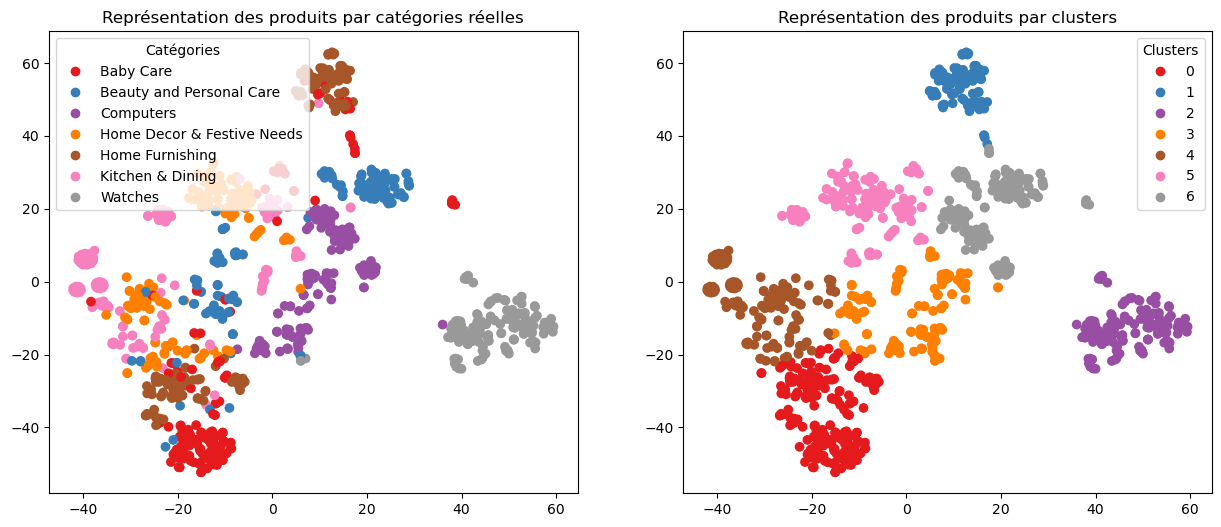

In [459]:
# Créer une figure de tracé
plt.figure(figsize=(15, 6))

# Noms des catégories réelles
category_names = [
    "Baby Care",
    "Beauty and Personal Care",
    "Computers",
    "Home Decor & Festive Needs",
    "Home Furnishing",
    "Kitchen & Dining",
    "Watches"
]

# Graphique des catégories réelles
plt.subplot(121)
# Création d'un colormap basé sur le nombre de catégories
cmap = plt.get_cmap('Set1', len(category_names))

# Assignation des couleurs en fonction de la catégorie
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['Cluster_cat'], cmap=cmap)
plt.title('Représentation des produits par catégories réelles')

# Création de la légende manuellement en utilisant la colormap
legend_handles = [plt.Line2D([0], [0], marker='o', color=cmap(i), linestyle='', label=category_names[i]) 
                  for i in range(len(category_names))]
plt.legend(handles=legend_handles, title="Catégories")

# Graphique des clusters K-Means
plt.subplot(122)
scatter = plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c=df_tsne['class'], cmap='Set1')
plt.title('Représentation des produits par clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")

# Afficher le graphique
plt.show()

#### <font color='Blue'> **USE : ARI Score**

In [461]:
# Calcul de l'ARI score
try:
    ari_score = adjusted_rand_score(df_tsne['class'], df_tsne['Cluster_cat'])
    print('ARI score: ', ari_score)
except KeyError as e:
    print(f"Erreur: La colonne {e} n'existe pas dans le DataFrame.")

ARI score:  0.42471782468627595


#### <font color='Blue'> **USE : Analyse des classes**

In [463]:
df_tsne.groupby("class").count()

,tsne1,tsne2,Cluster_cat,Category_name
class,,,,
0,203,203,203,203
1,92,92,92,92
2,149,149,149,149
3,138,138,138,138
4,153,153,153,153
5,154,154,154,154
6,161,161,161,161


In [464]:
# Convertir les catégories réelles en entiers
df_tsne['Cluster_cat'] = df_tsne['Cluster_cat'].astype(int)

# Convertir les clusters prédits en entiers
df_tsne['class'] = df_tsne['class'].astype(int)

# Calculer la matrice de confusion et le rapport de classification
confusion_matrix_df, classification_report_df = calculate_confusion_matrix(df_tsne['Cluster_cat'], df_tsne['class'])

# Afficher la matrice de confusion
print("Matrice de confusion :")
confusion_matrix_df

Matrice de confusion :


,Predicted Baby Care,Predicted Beauty and Personal Care,Predicted Computers,Predicted Home Decor & Festive Needs,Predicted Home Furnishing,Predicted Kitchen & Dining,Predicted Watches
Actual Baby Care,103,17,0,4,4,13,9
Actual Beauty and Personal Care,6,0,0,30,13,21,80
Actual Computers,0,0,1,79,0,0,70
Actual Home Decor & Festive Needs,15,0,0,4,49,82,0
Actual Home Furnishing,76,74,0,0,0,0,0
Actual Kitchen & Dining,3,1,0,19,87,38,2
Actual Watches,0,0,148,2,0,0,0


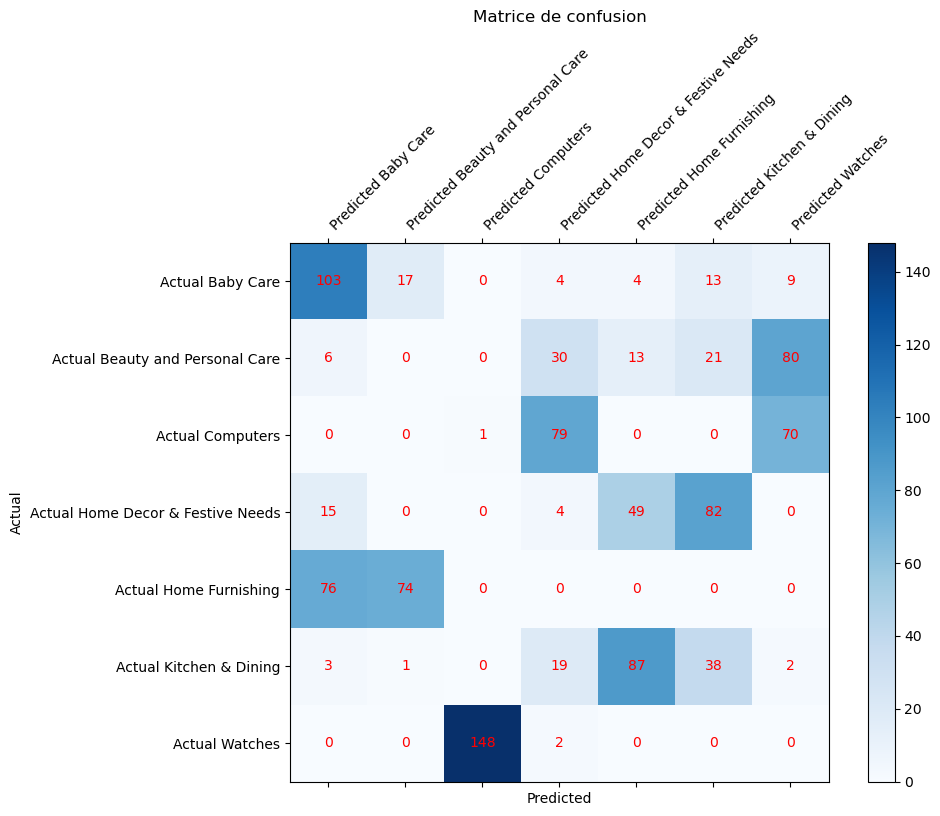

Rapport de classification :
              precision    recall  f1-score      support
0              0.507389  0.686667  0.583569   150.000000
1              0.000000  0.000000  0.000000   150.000000
2              0.006711  0.006667  0.006689   150.000000
3              0.028986  0.026667  0.027778   150.000000
4              0.000000  0.000000  0.000000   150.000000
5              0.246753  0.253333  0.250000   150.000000
6              0.000000  0.000000  0.000000   150.000000
accuracy       0.139048  0.139048  0.139048     0.139048
macro avg      0.112834  0.139048  0.124005  1050.000000
weighted avg   0.112834  0.139048  0.124005  1050.000000


In [465]:
# Afficher la matrice de confusion avec matplotlib
def plot_confusion_matrix(conf_mat, categories):
    fig, ax = plt.subplots(figsize=(10, 7))
    cax = ax.matshow(conf_mat, cmap='Blues')
    fig.colorbar(cax)

    for (i, j), value in np.ndenumerate(conf_mat):
        ax.text(j, i, f'{value}', ha='center', va='center', color='red')

    ax.set_xticks(np.arange(len(categories)))
    ax.set_yticks(np.arange(len(categories)))
    ax.set_xticklabels([f'Predicted {category}' for category in categories], rotation=45, ha='left')
    ax.set_yticklabels([f'Actual {category}' for category in categories])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matrice de confusion')
    plt.show()

# Afficher la matrice de confusion
plot_confusion_matrix(confusion_matrix_df.values, categories)

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report_df)

In [466]:
df_category.to_csv('df_category.csv', index=False)
print("DataFrame exporté avec succès dans df_category.csv")

DataFrame exporté avec succès dans df_category.csv


In [467]:
df_category.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_category,category_1,category_2,category_3,category_4,category_5,Cluster_cat,lemmatizer_cat,stemmed_cat,tokenize_cat,lemmatizer_name,tokenize_name,tokenize,tokenize_text,word_count
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56+00:00,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multico...",Home Furnishing,Curtains & Accessories,Curtains,"Elegance Polyester Multicolor Abstract Eyelet Do...""]",None,None,4,feature elegance polyester multicolor eyelet door curtain curtain elegance polyester multicolor eyelet door curtain pack price curtain enhances look interior curtain make quality polyester fabric feature eyelet style stitch metal ring make room environment love curtain wrinkle shrinkage apparanc...,key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain height pack price curtain enhanc look interior curtain made high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ...,feature elegance polyester multicolor eyelet door curtain curtain elegance polyester multicolor eyelet door curtain pack price curtain enhances look interior curtain make quality polyester fabric feature eyelet style stitch metal ring make room environment love curtain wrinkle shrinkage apparanc...,elegance polyester multicolor eyelet door curtain,elegance polyester multicolor eyelet door curtain,"[key, features, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, 213, cm, height, pack, 2, price, rs, 899, curtain, enhances, look, interiors, curtain, made, 100, high, quality, polyester, fabric,...",elegance polyester multicolor eyelet door curtain feature elegance polyester multicolor eyelet door curtain curtain elegance polyester multicolor eyelet door curtain pack price curtain enhances look interior curtain make quality polyester fabric feature eyelet style stitch metal ring make room e...,162
